<a href="https://colab.research.google.com/github/makeAlot/html-stations/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('/bank_train.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,50.0,entrepreneur,married,secondary,no,1857,no,yes,-1.0,0,unknown,fail
1,37.0,technician,single,secondary,no,363,yes,no,-1.0,0,unknown,fail
2,35.0,blue-collar,married,primary,no,422,yes,no,-1.0,0,unknown,fail


In [ ]:
df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
6411    False
6412    False
6413    False
6414    False
6415    False
Length: 6416, dtype: bool

In [ ]:
df.duplicated(keep=False).value_counts()

False    6357
True       59
dtype: int64

In [ ]:
# 削除前の shape の確認
df.shape

(6416, 12)

In [ ]:
# データ統計量の確認
df.describe()

,age,balance,pdays,previous
count,6326.000000,6416.000000,6380.000000,6416.000000
mean,40.980398,1329.536160,39.616458,0.573410
std,10.612138,2711.424072,97.745220,1.955045
min,18.000000,-3313.000000,-1.000000,0.000000
25%,33.000000,75.000000,-1.000000,0.000000
50%,39.000000,473.000000,-1.000000,0.000000
75%,49.000000,1463.250000,-1.000000,0.000000
max,93.000000,43074.000000,838.000000,55.000000


(array([ 172., 1373., 1941., 1109., 1044.,  542.,   81.,   37.,   25.,
           2.]),
 array([18. , 25.5, 33. , 40.5, 48. , 55.5, 63. , 70.5, 78. , 85.5, 93. ]),
 <BarContainer object of 10 artists>)

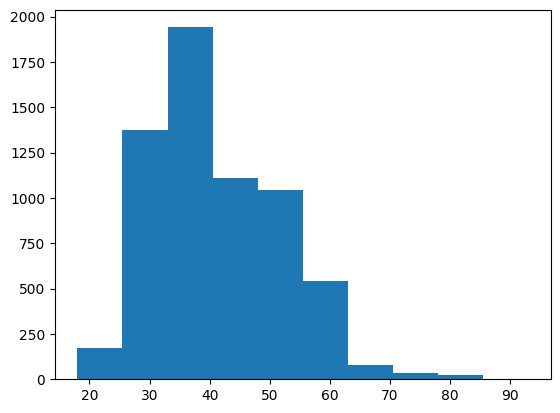

In [ ]:
# ageは平均値で補完
plt.hist(df['age'])

In [ ]:
# 平均値の確認
df['age'].mean()

40.98039835599115

In [ ]:
# 欠損値を平均値で補完
df = df.fillna({'age':df['age'].mean()})

In [ ]:
# 文字列に対して欠損値補完→最頻値で補完する
df['job'].unique()

array(['entrepreneur', 'technician', 'blue-collar', 'retired',
       'management', 'unknown', 'admin.', 'student', 'services',
       'unemployed', 'self-employed', 'housemaid', nan], dtype=object)

In [ ]:
df['job'].mode()

0    blue-collar
Name: job, dtype: object

In [ ]:
df['job'].mode()[0]

'blue-collar'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'job':df['job'].mode()[0]})

In [ ]:
# 文字列に対して欠損値補完→最頻値で補完する
df['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [ ]:
df['marital'].mode()

0    married
Name: marital, dtype: object

In [ ]:
df['marital'].mode()[0]

'married'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'marital':df['marital'].mode()[0]})

In [ ]:
# 文字列に対して欠損値補完→最頻値で補完する
df['default'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df['default'].mode()

0    no
Name: default, dtype: object

In [ ]:
df['default'].mode()[0]

'no'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'default':df['default'].mode()[0]})

In [ ]:
# 文字列に対して欠損値補完→最頻値で補完する
df['housing'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df['housing'].mode()

0    yes
Name: housing, dtype: object

In [ ]:
df['housing'].mode()[0]

'yes'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'housing':df['housing'].mode()[0]})

In [ ]:
# 文字列に対して欠損値補完→最頻値で補完する
df['loan'].unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df['loan'].mode()

0    no
Name: loan, dtype: object

In [ ]:
df['loan'].mode()[0]

'no'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'pdays':df['pdays'].median()[0]})

(array([5.283e+03, 2.790e+02, 3.380e+02, 2.340e+02, 2.260e+02, 1.400e+01,
        2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([ -1. ,  82.9, 166.8, 250.7, 334.6, 418.5, 502.4, 586.3, 670.2,
        754.1, 838. ]),
 <BarContainer object of 10 artists>)

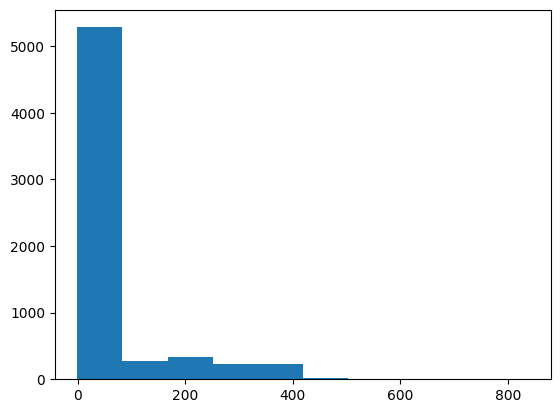

In [ ]:
# 外れ値があり、散らばりが少ないので中央値で補完する
plt.hist(df['pdays'])

In [ ]:
# 中央値の確認
df['pdays'].median()

-1.0

In [ ]:
# 欠損値を中央値で補完
df = df.fillna({'pdays':df['pdays'].median()})

In [ ]:
# 文字列に対して欠損値補完→最頻値で補完する
df['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other', nan], dtype=object)

In [ ]:
df['poutcome'].mode()

0    unknown
Name: poutcome, dtype: object

In [ ]:
df['poutcome'].mode()[0]

'unknown'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'poutcome':df['poutcome'].mode()[0]})

In [ ]:
# 欠損値の確認
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,job,marital,education,default,housing,loan,poutcome,result
0,entrepreneur,married,secondary,no,no,yes,unknown,fail
1,technician,single,secondary,no,yes,no,unknown,fail
2,blue-collar,married,primary,no,yes,no,unknown,fail


In [ ]:
df_uni = df_obj.nunique()
df_uni

job          12
marital       3
education     4
default       2
housing       2
loan          2
poutcome      4
result        2
dtype: int64

In [ ]:
for uni in df_obj.columns:
    print(uni)
    print(df_obj[uni].unique())

job
['entrepreneur' 'technician' 'blue-collar' 'retired' 'management'
 'unknown' 'admin.' 'student' 'services' 'unemployed' 'self-employed'
 'housemaid']
marital
['married' 'single' 'divorced']
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['yes' 'no']
poutcome
['unknown' 'success' 'failure' 'other']
result
['fail' 'success']


In [ ]:
# ユニークな値が 2 種類の列名のみ取得
df_cols = df_uni[df_uni == 2].index
df_cols

Index(['default', 'housing', 'loan', 'result'], dtype='object')

In [ ]:
# ２値のカテゴリカル変数をまとめてラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_cols:
  le = LabelEncoder()
  le.fit(df[col])
  df[col] = le.transform(df[col])

In [ ]:
#　one-hot-encodingの実装
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head(3)

,age,default,balance,housing,loan,pdays,previous,result,job_blue-collar,job_entrepreneur,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,50.0,0,1857,0,1,-1.0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,37.0,0,363,1,0,-1.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,35.0,0,422,1,0,-1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# 入力変数と出力変数の切り分け
t = df['result'].values
x = df.drop(['result'], axis=1).values

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

# モデルの宣言
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [ ]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.12679446357486535
test score :  0.15981594373843344


<Axes: xlabel='age', ylabel='Density'>

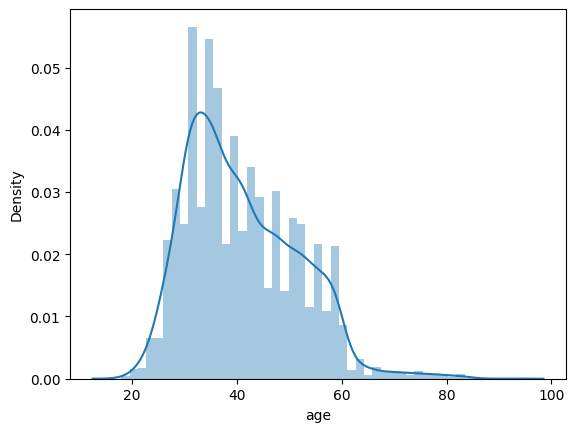

In [ ]:
# 分布を表示
sns.distplot(df['age'])

In [ ]:
mu = df['age'].mean() # 平均値
sigma = df['age'].std() # 標準偏差

In [ ]:
# 3σ法の中身を取得
df3 = df[(mu - 3 * sigma <= df['age']) & (df['age'] <= mu + 3 * sigma)]

In [ ]:
# オリジナルのデータフレーム
df.shape

(6416, 27)

In [ ]:
# 外れ値除去後のデータフレーム
df3.shape

(6362, 27)

t = df3['result'].values #df3に変更
x = df3.drop(['result'], axis=1).values #df3 に変更

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

In [ ]:
# 決定木
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [ ]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# モデルの検証
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  0.9991093297706524
test score :  0.8275324675324676


In [ ]:
# 推論
dtree.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

In [ ]:
# 木構造の表示
#graph_tree = graphviz.Source(dot_data)
#graph_tree

In [ ]:
# feature importance
feature_importance = dtree.feature_importances_
feature_importance

array([0.1629372 , 0.00374621, 0.37004276, 0.01345911, 0.01460287,
       0.09177067, 0.02105961, 0.01718974, 0.0054133 , 0.00718287,
       0.0311349 , 0.00371249, 0.00569577, 0.01374181, 0.01149174,
       0.02145098, 0.0073183 , 0.00177968, 0.02674146, 0.01259308,
       0.02234005, 0.0172324 , 0.00847771, 0.00639915, 0.09989638,
       0.00258978])

In [ ]:
# 可視化
#y = feature_names
#width = feature_importance

# 横向きで表示
#plt.barh(y=y, width=width);

In [ ]:
# モデルの定義　サポートベクトルマシン
from sklearn.svm import SVC
svc = SVC()

In [ ]:
# モデルの学習
svc.fit(x_train, t_train)

SVC()

In [ ]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.8875528835448675
test score :  0.8815584415584415


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
std_scaler.fit(x_train)

StandardScaler()

In [ ]:
# 標準化
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [ ]:
# 平均
round(x_train_std.mean())

0

In [ ]:
# 標準偏差
round(x_train_std.std())

1

In [ ]:
# モデルの定義
svc_std = SVC()

In [ ]:
# モデルの学習
svc_std.fit(x_train_std, t_train)

SVC()

In [ ]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score :  0.8875528835448675
test score :  0.8815584415584415
train score scaling :  0.903584947673124
test score scaling :  0.8971428571428571


In [ ]:
# モデルの定義　ロジスティック回帰
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)

In [ ]:
# モデルの学習
log_reg.fit(x_train, t_train)

LogisticRegression()

In [ ]:
# モデルの検証
print('train score : ', log_reg.score(x_train, t_train))
print('test score : ', log_reg.score(x_test, t_test))

train score :  0.8871075484301937
test score :  0.8831168831168831


In [ ]:
# モデルの定義ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=0)

In [ ]:
# モデルの学習
model.fit(x_train, t_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=0)

In [ ]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.8888888888888888
test score :  0.8815584415584415


In [ ]:
# モデルの定義xboost
from xgboost import XGBClassifier
model = XGBClassifier()

# モデルの学習
model.fit(x_train, t_train)

# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))


train score :  0.9445557782231129
test score :  0.892987012987013


In [ ]:
# ハイパラメーター調整
# GridSearchCV クラスのインポート
from sklearn.model_selection import GridSearchCV

In [ ]:
# 学習に使用するアルゴリズムの定義
estimator = DecisionTreeClassifier(random_state=0)

In [ ]:
# 探索するハイパーパラメータと範囲の定義
param_grid = [{
    'max_depth': [3, 20, 50],
    'min_samples_split': [3, 20, 30]
}]

In [ ]:
# データセット分割数を定義
cv = 5

In [ ]:
# GridSearchCV クラスを用いたモデルの定義
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv, return_train_score=False)

In [ ]:
# モデルの学習＆検証
tuned_model.fit(x_train, t_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': [3, 20, 50],
                          'min_samples_split': [3, 20, 30]}])

In [ ]:
# 検証結果の確認
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.006217,0.004722,0.005278,0.018544,0.017739,0.018048,0.02001,0.020583,0.019754
std_fit_time,0.00215,0.000033,0.000772,0.000355,0.000543,0.001334,0.00096,0.002683,0.00267
mean_score_time,0.000905,0.000695,0.000823,0.001016,0.001005,0.001017,0.001068,0.00115,0.001124
std_score_time,0.000337,0.000031,0.000222,0.000033,0.000027,0.000065,0.000025,0.000194,0.000146
param_max_depth,3,3,3,20,20,20,50,50,50
param_min_samples_split,3,20,30,3,20,30,3,20,30
params,"{'max_depth': 3, 'min_samples_split': 3}","{'max_depth': 3, 'min_samples_split': 20}","{'max_depth': 3, 'min_samples_split': 30}","{'max_depth': 20, 'min_samples_split': 3}","{'max_depth': 20, 'min_samples_split': 20}","{'max_depth': 20, 'min_samples_split': 30}","{'max_depth': 50, 'min_samples_split': 3}","{'max_depth': 50, 'min_samples_split': 20}","{'max_depth': 50, 'min_samples_split': 30}"
split0_test_score,0.889878,0.889878,0.889878,0.856507,0.873192,0.87208,0.836485,0.869855,0.869855
split1_test_score,0.896437,0.894209,0.894209,0.851893,0.879733,0.880846,0.849666,0.878619,0.880846
split2_test_score,0.903118,0.903118,0.903118,0.85412,0.876392,0.879733,0.836303,0.865256,0.86971


In [ ]:
estimator = DecisionTreeClassifier(random_state=0)
cv = 5
param_grid = [{
    'max_depth': [5, 10, 15] ,
    'min_samples_split': [10, 12, 15]
}]

In [ ]:
# モデルの定義
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv, return_train_score=False)

# モデルの学習
tuned_model.fit(x_train, t_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': [10, 12, 15]}])

In [ ]:
# 学習結果の確認
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.00862,0.007457,0.00722,0.012087,0.012176,0.012411,0.017453,0.01674,0.016023
std_fit_time,0.001777,0.000831,0.000345,0.000099,0.000101,0.000543,0.002306,0.001227,0.000286
mean_score_time,0.001275,0.000806,0.000777,0.000838,0.000919,0.000891,0.001086,0.001065,0.001006
std_score_time,0.000594,0.000114,0.000026,0.000031,0.000039,0.000041,0.000132,0.000121,0.000009
param_max_depth,5,5,5,10,10,10,15,15,15
param_min_samples_split,10,12,15,10,12,15,10,12,15
params,"{'max_depth': 5, 'min_samples_split': 10}","{'max_depth': 5, 'min_samples_split': 12}","{'max_depth': 5, 'min_samples_split': 15}","{'max_depth': 10, 'min_samples_split': 10}","{'max_depth': 10, 'min_samples_split': 12}","{'max_depth': 10, 'min_samples_split': 15}","{'max_depth': 15, 'min_samples_split': 10}","{'max_depth': 15, 'min_samples_split': 12}","{'max_depth': 15, 'min_samples_split': 15}"
split0_test_score,0.889878,0.889878,0.889878,0.879867,0.882091,0.884316,0.866518,0.870968,0.873192
split1_test_score,0.898664,0.899777,0.89755,0.883073,0.883073,0.883073,0.874165,0.873051,0.871938
split2_test_score,0.903118,0.903118,0.906459,0.896437,0.893096,0.898664,0.880846,0.886414,0.884187


In [ ]:
# 最も予測精度の高かったハイパーパラメータの確認
tuned_model.best_params_

{'max_depth': 5, 'min_samples_split': 12}

In [ ]:
# 最も予測精度の高かったモデルの引き継ぎ
best_model = tuned_model.best_estimator_

# モデルの検証
print(best_model.score(x_train, t_train))
print(best_model.score(x_test, t_test))

0.9062569583611668
0.8940259740259741


In [ ]:
dfpred = pd.read_csv('/bank_testのコピー.csv')

In [ ]:
dfpred = dfpred.fillna({'age':dfpred['age'].mean()})
dfpred = dfpred.fillna({'job':dfpred['job'].mode()[0]})
dfpred = dfpred.fillna({'marital':dfpred['marital'].mode()[0]})
dfpred = dfpred.fillna({'default':dfpred['default'].mode()[0]})
dfpred = dfpred.fillna({'housing':dfpred['housing'].mode()[0]})
dfpred = dfpred.fillna({'loan':dfpred['loan'].mode()[0]})
dfpred = dfpred.fillna({'poutcome':dfpred['poutcome'].mode()[0]})
dfpred = dfpred.fillna({'pdays':dfpred['pdays'].median()})

In [ ]:
dfpred_obj = dfpred.select_dtypes(include='object')
dfpred_obj.head(3)
dfpred_uni = dfpred_obj.nunique()
dfpred_uni

job          12
marital       3
education     4
default       2
housing       2
loan          2
poutcome      4
result        2
dtype: int64

In [ ]:
# ユニークな値が 2 種類の列名のみ取得
dfpred_cols = dfpred_uni[dfpred_uni == 2].index
dfpred_cols

Index(['default', 'housing', 'loan', 'result'], dtype='object')

In [ ]:
for col in dfpred_cols:
  le = LabelEncoder()
  le.fit(dfpred[col])
  dfpred[col] = le.transform(dfpred[col])
dfpred.head(3)

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,55.0,self-employed,married,tertiary,0,1810,1,0,-1.0,0,unknown,0
1,54.0,management,married,tertiary,0,364,1,0,-1.0,0,unknown,0
2,35.0,technician,married,secondary,0,-180,0,1,-1.0,0,unknown,1


In [ ]:
dfpred = pd.get_dummies(dfpred, drop_first=True)

In [ ]:
y = tuned_model.predict(dfpred)

ValueError: ignored